# Experiments driver for NATOPS

This notebook collects the experiments performed for TIME 2025.

After a preprocessing phase of the data (e.g., slice out a specific class from the dataset), 
you can probe the most representative motifs (i.e., the time series snippets) and give them
a name, or you can just load the exact names we used for the paper; more details are 
provided in the comments of each cell.

In [1]:
import Pkg
using Serialization: serialize, deserialize

# activate the general environment of ModalAssociationRules.jl package
Pkg.activate(joinpath("..", "..", ".."))

# a collection of utilities
include(joinpath("..", "experiments-driver.jl"));

  Activating project at `~/.julia/dev/ModalAssociationRules`


In [2]:
# algorithm to be used for mining
miningalgo = apriori

# distance function to compare a time series and a motif of the same length; 
# we suggest to use Z-Normalized Euclidean distance if you are not interested in the scale
# but just in identifying common shapes between signals.
expdistance = (x, y) -> zeuclidean(x, y) |> first;

In [50]:
# load NATOPS dataset
X, y = load_NATOPS();

# also, insert a new column representing the difference in height between the thumb and 
# the middle finger tip of the right hand;
# this is useful to describe "All clear" and "Not clear" classes.
_min_rhand = minimum(minimum(X[:,5])) |> abs
_rhand_y_corrected = [v.+abs(_min_rhand) for v in X[:,5]]
_thumb_y_corrected = [v.+abs(_min_rhand) for v in X[:,23]]
_delta_thumb = (_rhand_y_corrected - _thumb_y_corrected)
_delta_thumb_corrected = [v.-_min_rhand for v in _delta_thumb]

insertcols!(X, 25, "ΔY[Thumb r and Hand tip r]" => _delta_thumb_corrected);

In [4]:
# separate all the classes in separate collections

# I have command
IHCC = reduce(vcat, [X[1:30, :], X[(180+1):(180+30), :]]);
# All clear
ACC = reduce(vcat, [X[31:60, :], X[(180+31):(180+60), :]]);
# Not clear
NCC = reduce(vcat, [X[61:90, :], X[(180+61):(180+90), :]]);
# Spread wings
SWC = reduce(vcat, [X[91:120, :], X[(180+91):(180+120), :]]);
# Fold wings
FWC = reduce(vcat, [X[121:150, :], X[(180+121):(180+150), :]]);
# Lock wings
LWC = reduce(vcat, [X[151:180, :], X[(180+151):(360), :]]);

In [5]:
# name for each variable;
# this will be useful later when printing during the snippets labeling

variablenames = [
    "X[Hand tip l]", "Y[Hand tip l]", "Z[Hand tip l]",
    "X[Hand tip r]", "Y[Hand tip r]", "Z[Hand tip r]",
    "X[Elbow l]", "Y[Elbow l]", "Z[Elbow l]",
    "X[Elbow r]", "Y[Elbow r]", "Z[Elbow r]",
    "X[Wrist l]", "Y[Wrist l]", "Z[Wrist l]",
    "X[Wrist r]", "Y[Wrist r]", "Z[Wrist r]",
    "X[Thumb l]", "Y[Thumb l]", "Z[Thumb l]",
    "X[Thumb r]", "Y[Thumb r]", "Z[Thumb r]",
    "ΔY[Thumb r and Hand tip r]"
];

## I have command

In [ ]:
# run this cell if you need to create your literals, that is,
# to extract snippets from time series and give them a name.

ids, motifs, featurenames = label_motifs(
    IHCC, 
    vcat(collect(4:6), collect(10:12)), # consider only right hand and right elbow,
    "NATOPS-IHCC"
)

In [ ]:
# run this cell if you already created your literals
ids, motifs, featurenames = load_motifs("NATOPS-IHCC")

In [ ]:
# run the experiment (hyperparameters are `initialize_experiment` kwargs) & save the results
logiset, miner = initialize_experiment(ids, motifs, featurenames, IHCC)
experiment!(miner, "i_have_command")

# Not clear

In [ ]:
ids, motifs, featurenames = label_motifs(
    NCC, 
    vcat(collect(4:6), collect(10:12), 25),
    "NATOPS-NCC"
)

In [ ]:
ids, motifs, featurenames = load_motifs("NATOPS-NCC")

In [ ]:
logiset, miner = initialize_experiment(ids, motifs, featurenames, NCC)
experiment!(miner, "not_clear")

# Lock wings

In [ ]:
ids, motifs, featurenames = label_motifs(
    LWC, 
    vcat(collect(1:12)),
    "NATOPS-LWC"
)

In [ ]:
ids, motifs, featurenames = load_motifs("NATOPS-LWC")

In [ ]:
logiset, miner = initialize_experiment(ids, motifs, featurenames, LWC)
experiment!(miner, "lock_wings")

# Plots

In [6]:
using Plots
using PGFPlotsX
pgfplotsx()

Plots.PGFPlotsXBackend()

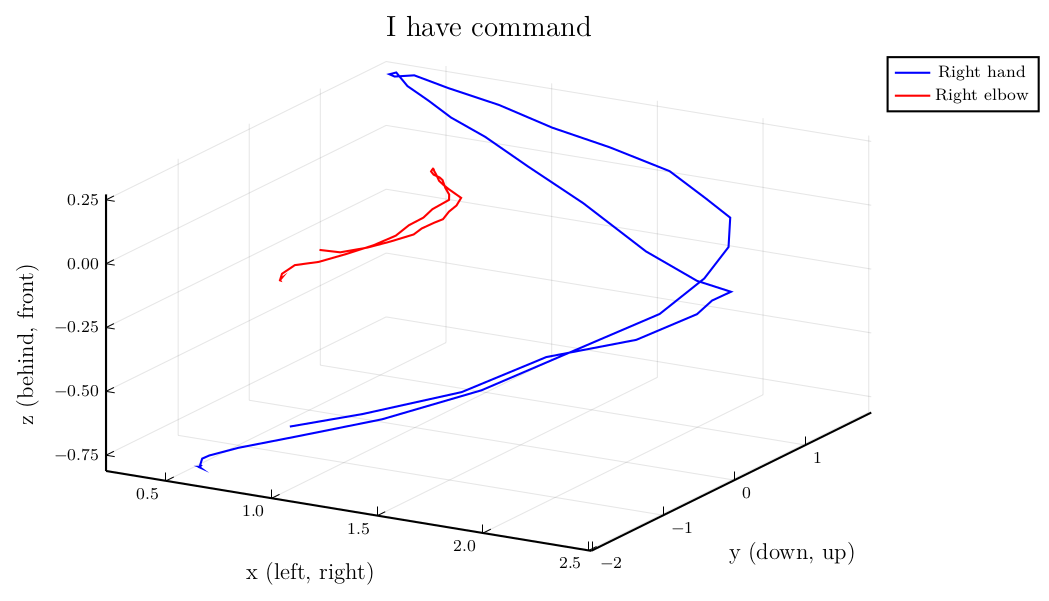

In [11]:
IHCC_plot = plot(IHCC[1,4], IHCC[1,5], IHCC[1,6], 
    label = "Right hand", linecolor = :blue, linewidth = 1,);

plot!(IHCC[1,10], IHCC[1,11], IHCC[1,12],
    label = "Right elbow", linecolor = :red, linewidth = 1,)

xlabel!("x (left, right)")
ylabel!("y (down, up)")
zlabel!("z (behind, front)")

title!("I have command")

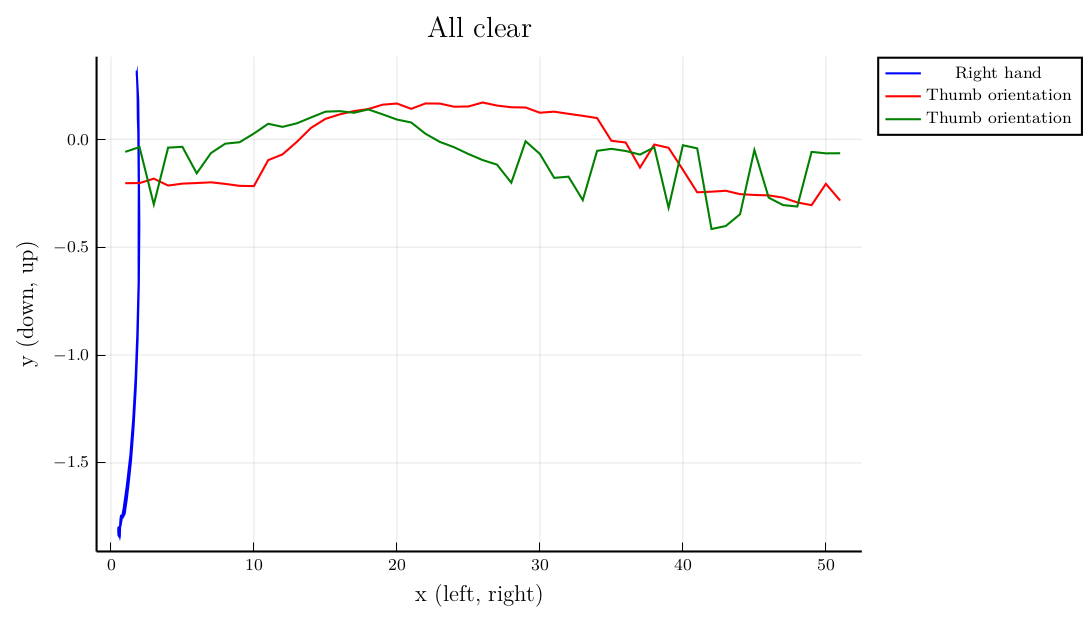

In [51]:
ACC_plot = plot(ACC[2,4], ACC[2,5],
    label = "Right hand", linecolor = :blue, linewidth = 1,);

plot!(NCC[1,25],
    label = "Thumb orientation", linecolor = :red, linewidth = 1,)

plot!(ACC[1,25],
    label = "Thumb orientation", linecolor = :GREEN, linewidth = 1,)

xlabel!("x (left, right)")
ylabel!("y (down, up)")

title!("All clear")